<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 3 </b>
    
Thank you for your diligence! I've left a couple of new comments with digit 3, but there's nothing that needs to be fixed.
    
    
You did a fantastic job here. You have correctly splitted the data, explored the distributions, trained several models, and applied the bootstrapping technique. You have successfully estimated profit and conducted risk analysis. You have also compared regions based on risk-adjusted return to make recommendations for further development. Excellent job! 
    
    
I do not have any questions, so the project can be accepted. The next sprints will cover more advanced machine learning methods, I hope you will like it. Good luck! 
    
    

</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2 </b>
    
Thank you very much for the updates! There're just a couple of issues this time. Would you take a look at my new comments with digit 2? 
    

</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi Mika, I am a reviewer on this project. Congratulations on submitting another project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    

   
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    

    
- Used linear regression to make predictions;
    
    
- Calculated profit and estimated risk values; 
    
    
- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. For instance,




- Please try to explore the distributions and add conclusions. In real-world problems, the data is rarely clean. Displaying distributions help us evaluate the data, find outliers, identify the required preprocessing steps and understand feature relationships, which informs feature engineering. Feature engineering in some cases is a clue; 



    
- Consider specifying the `random_state` parameter inside the `sample` method to ensure reproducibility. Otherwise, the results may differ with each run.
    



- Please don't train the models again in the bootstrapping loop. You have already done it. Please use the existing predictions and sample 500 points from them, do not train models on sampled data.
    


There may be other issues that need your attention. I described everything in my comments.  
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> you did a great job here, thank you so much for submitting the project! Actually the project is almost perfect, and the updates should not take much time. If you have any questions, please feel free to ask. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr> 
    
✍️ Here's a nice [article](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/) about the bootstrap method. [This](https://www.youtube.com/watch?v=O_Fj4q8lgmc&list=LL&index=6) is a good video about resampling in bootstrapping.
    
<hr>
    
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance 😉 
</div>

# Optimal Oil Well Site Selection: Predictive Modeling and Bootstrapping Risk Analysis for Maximizing Profit

## Introduction
In today’s competitive energy market, strategic placement of new oil wells is pivotal to ensuring a high return on investment. As part of the OilyGiant mining company, our mission is to identify the best region for drilling a new oil well by leveraging advanced predictive modeling techniques alongside robust risk assessment. With detailed data on oil well parameters including oil quality and reserve volume from three distinct regions, we set out to build a model that forecasts reserve volumes in potential new wells.

Our approach begins by predicting the reserve volumes based on historical oil samples. We then rank the oil wells by their estimated values and determine the region where the combined profit from selecting the highest valued wells is maximized. To supplement our decision making process, we employ the bootstrapping technique. This method allows us to analyze potential profit margins and quantify associated risks by simulating a wide range of outcomes based on our data variability.

By integrating predictive analytics with bootstrapped risk analysis, we aim to provide a clear, quantifiable strategy for selecting the optimal drilling location, ensuring that our next investment yields the highest profit while adequately managing uncertainty.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good introduction! The title reflects the main goal of the project, well done!     
</div>

## Load, Inspect, and Prepare the Data 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Explanation:

Reading the Files: The pd.read_csv() function loads each CSV file into a DataFrame. This step assumes that the CSV files are in the same directory or that you provide the correct file path.

Adding a Region Identifier: Since the data comes from three distinct regions, adding a region column (with values 0, 1, or 2) allows you to keep track of their origin. Later in the project, you may need to compare regions directly.

Combining the DataFrames: Using pd.concat() with ignore_index=True combines the three DataFrames into one unified DataFrame. This is optional and depends on whether you want to work on the data for each region separately or together.

Inspection: Calling data.info() and data.head() gives you an overview of the dataframe’s structure, while data.isnull().sum() tells you if there are any missing values. Proper data inspection helps verify that the data was loaded correctly and is ready for further processing.

In [2]:
# Load the datasets for the three regions
geo0 = pd.read_csv('/datasets/geo_data_0.csv')
geo1 = pd.read_csv('/datasets/geo_data_1.csv')
geo2 = pd.read_csv('/datasets/geo_data_2.csv')

# As a convenience, create a new column that indicates the region for each dataset
geo0['region'] = 0
geo1['region'] = 1
geo2['region'] = 2

# Combine the three dataframes into one for overall analysis
data = pd.concat([geo0, geo1, geo2], ignore_index=True)

# Check the structure and basic information of the combined data
print(data.info())
display(data.head())

# Check for missing values
print(data.isnull().sum())

print(data.duplicated().sum())  # Count duplicate rows

print(data.describe())  # Get summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       300000 non-null  object 
 1   f0       300000 non-null  float64
 2   f1       300000 non-null  float64
 3   f2       300000 non-null  float64
 4   product  300000 non-null  float64
 5   region   300000 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ MB
None


,id,f0,f1,f2,product,region
0,txEyH,0.705745,-0.497823,1.221170,105.280062,0
1,2acmU,1.334711,-0.340164,4.365080,73.037750,0
2,409Wp,1.022732,0.151990,1.419926,85.265647,0
3,iJLyR,-0.032172,0.139033,2.978566,168.620776,0
4,Xdl7t,1.988431,0.155413,4.751769,154.036647,0


id         0
f0         0
f1         0
f2         0
product    0
region     0
dtype: int64
0
                  f0             f1             f2        product  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        0.547913      -1.516172       2.497439      85.441667   
std         5.316634       3.900220       2.916502      46.519494   
min       -31.609576     -26.358598     -12.088328       0.000000   
25%        -1.003037      -2.478939       0.648213      52.666629   
50%         0.347934      -0.229632       2.491215      84.038886   
75%         1.755365       0.678562       4.344943     124.174086   
max        29.421755      18.734063      16.739402     190.029838   

              region  
count  300000.000000  
mean        1.000000  
std         0.816498  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         2.000000  
max         2.000000  


The output obtained indicates that the data was loaded and merged correctly.

## Data Preparation

After loading the data, we may perform any necessary cleaning or transformation steps.

Confirm Data Types: Ensure that the feature columns (f0, f1, f2) and the target column (product) are in the correct numeric formats. Since the data is synthetic, we may not need extensive cleaning if there are no missing values or erroneous entries.

Select Relevant Columns: For modeling purposes, we'll use features (f0, f1, f2) to predict the target, product, which represents the volume of reserves (in thousand barrels).

,f0,f1,f2
0,0.705745,-0.497823,1.221170
1,1.334711,-0.340164,4.365080
2,1.022732,0.151990,1.419926
3,-0.032172,0.139033,2.978566
4,1.988431,0.155413,4.751769


0    105.280062
1     73.037750
2     85.265647
3    168.620776
4    154.036647
Name: product, dtype: float64

f0   -0.030439
f1    0.137210
f2    0.533554
dtype: float64


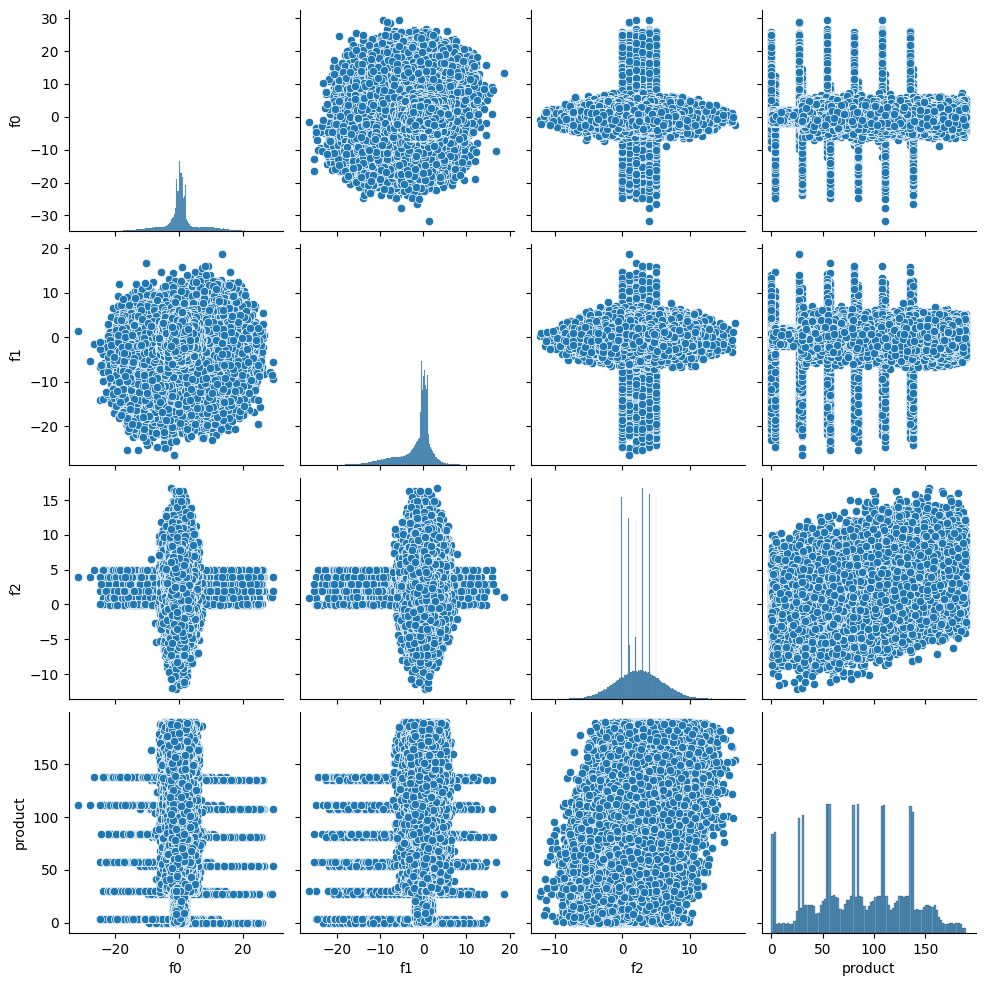

In [3]:
# Select the feature columns and target
features = data[['f0', 'f1', 'f2']]
target = data['product']

# Display the first few rows of the prepared features and target
display(features.head())
display(target.head())

print(features.corrwith(target))  # Quick correlation check
sns.pairplot(data[['f0', 'f1', 'f2', 'product']])  # Visualize relationships

Our output indicates that the data preparation has been successful:

Features: The printed table for f0, f1, and f2 shows the first five rows of our features DataFrame, confirming that these columns have been correctly extracted from the combined dataset.

Target: The printed series for the product column (which represents the volume of reserves in thousand barrels) shows the first five values. This confirms that your target variable is correctly set up.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Well done! 

</div>

## Analyzing features and targets distributions

<Figure size 1200x600 with 0 Axes>

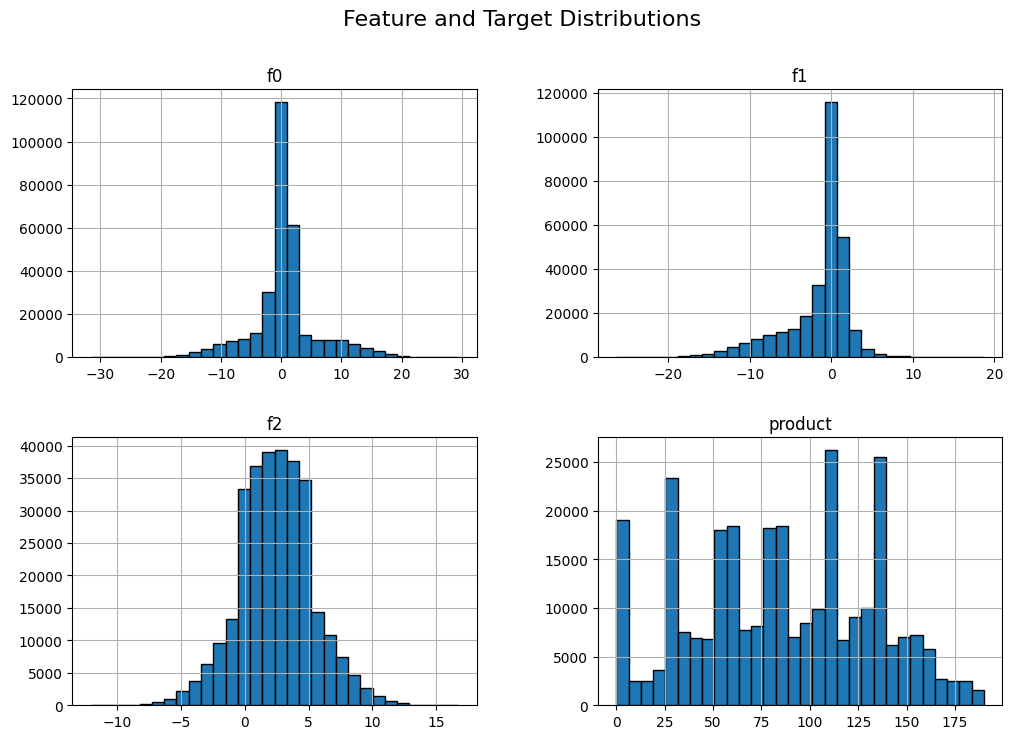

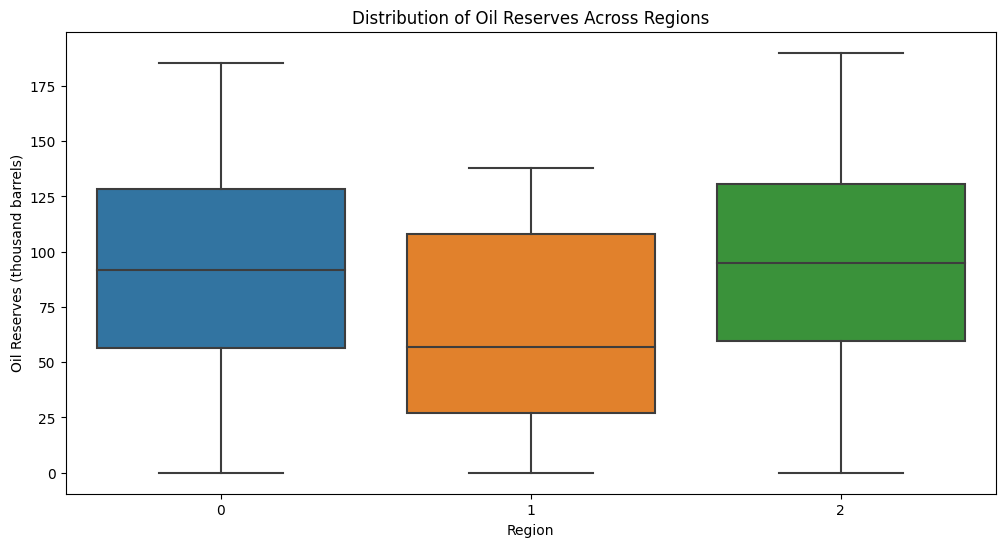

In [4]:
# Set figure size
plt.figure(figsize=(12, 6))

# Plot histograms for features and target
data[['f0', 'f1', 'f2', 'product']].hist(bins=30, figsize=(12, 8), edgecolor='black')

# Add a title
plt.suptitle('Feature and Target Distributions', fontsize=16)
plt.show()

plt.figure(figsize=(12, 6))

# Boxplot for product distribution across regions
sns.boxplot(x='region', y='product', data=data)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Oil Reserves (thousand barrels)')
plt.title('Distribution of Oil Reserves Across Regions')

plt.show()


### Result Summary: 

Region 0 & Region 2 are stronger candidates for profitability. Region 1 might be riskier due to lower median reserves. Bootstrapping will be crucial to analyze risk and ensure the chosen region has a low probability of losses

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Very good job! 
</div><div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    


- Let's add some EDA. Are there any duplicates in the data?     



- Let's analyze features and targets distributions in each dataframe. Would you add charts? Try to use histograms and boxplots.  Please don't forget to add titles and axes labels.


- We will also need to add conclusions. 
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
    
Since we are using a linear model, it may be useful to conduct correlation analysis.

</div>

## Train and Test 

### Explanation:
 ###### Data Subsetting by Region: 
 
   Using the region column, we extract data for each region so that predictions and evaluation can be performed independently.

 ###### Train-Test Split: 
 
   With train_test_split, we reserve 25% of the data for validation. This split is performed separately for each region, ensuring that the model is trained only on the corresponding region’s data.

 ###### Model Training and Prediction: 
 
   We use scikit-learn’s LinearRegression model because the project specifies a linear regression approach. Once the model is trained on the training set, predictions are made on the validation set.

 ###### Evaluation Metrics:
 
   The average predicted volume is computed from the predictions array.
   The RMSE is computed using the mean_squared_error function to quantify prediction error.

In [5]:
# Store results
all_predictions = []
rmse_dict = {}

print("Model Evaluation for each region:")
for r in data['region'].unique():
    print("\nRegion:", r)
    
    # Extract data for region r
    region_data = data[data['region'] == r]
    X = region_data[['f0', 'f1', 'f2']]
    y = region_data['product']
    
    # Split data
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)
    
    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    
    # Train model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_valid_scaled)
    
    # Store predictions
    predictions = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred}, index=y_valid.index)
    all_predictions.append(predictions)
    
    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    rmse_dict[r] = rmse
    
    # Print results
    print(f"Average Predicted Volume: {np.mean(y_pred):.2f} thousand barrels")
    print(f"Model RMSE: {rmse:.2f}")
    print(f"Average Actual Volume: {np.mean(y_valid):.2f} thousand barrels")

# Combine predictions into a single DataFrame
all_predictions_df = pd.concat(all_predictions)

# Compute final RMSE across all regions
final_score = np.mean(list(rmse_dict.values()))
print("\nFinal average RMSE across all regions: {:.2f}".format(final_score))

Model Evaluation for each region:

Region: 0
Average Predicted Volume: 92.27 thousand barrels
Model RMSE: 37.48
Average Actual Volume: 92.47 thousand barrels

Region: 1
Average Predicted Volume: 69.15 thousand barrels
Model RMSE: 0.89
Average Actual Volume: 69.15 thousand barrels

Region: 2
Average Predicted Volume: 94.71 thousand barrels
Model RMSE: 40.31
Average Actual Volume: 95.47 thousand barrels

Final average RMSE across all regions: 26.23


### Analysis:

Accuracy vs. Precision: Although Regions 0 and 2 have average predictions matching the actual averages, their RMSE values are large. This tells us that while the model is unbiased overall, it lacks precision for individual predictions in those regions.

Risk Implications: High RMSE implies uncertainty in estimating potential reserves at the well level. In terms of risk evaluation (a crucial next step), a low RMSE (as seen in Region 1) suggests that the revenue predictions would be more reliable.

Region 1 stands out as having consistently accurate predictions. Regions 0 and 2, despite having correct average predictions, might pose higher risk due to the variability in individual well estimates.

In conclusion, Region 1 appears to be the safest bet from a predictive standpoint, given its outstanding RMSE performance. This variation in prediction errors across regions will be an important factor when assessing overall profit and risk in later steps of the project.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Correct! Region 2 is the most profitable, but it has the highest model error at the same time. 

</div>

## Prepare for profit calculation

### Store Key Values

Explanation: Here we define the total budget and number of wells, and compute the cost per well. We also specify that the revenue from one unit of product.

In [6]:
# Budget and revenue-related parameters:
total_budget = 100e6            # Total budget for 200 wells: 100 million USD
n_wells = 200                   # Number of oil wells to be developed
cost_per_well = total_budget / n_wells   # Cost per well (in USD)
revenue_per_unit = 4500         # Revenue, in dollars, from 1 unit of product (i.e., 1 thousand barrels)

print("Cost per well: ${:,.0f}".format(cost_per_well))
print("Revenue per unit (thousand barrels): ${:,}".format(revenue_per_unit))

# Calculate the break-even volume (in thousand barrels) per well
breakeven_volume = cost_per_well / revenue_per_unit
print("Break-even reserve volume per well: {:.2f} thousand barrels".format(breakeven_volume))

Cost per well: $500,000
Revenue per unit (thousand barrels): $4,500
Break-even reserve volume per well: 111.11 thousand barrels


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Correct! 

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

Constant values should be defined in the upper case and in the very beginning of the project.  
    
</div>

### Compare with Each Region’s Average Reserves and Findings

In [7]:
# Compute average reserve model (product is in thousand barrels) per region
avg_region0 = data[data['region'] == 0]['product'].mean()
avg_region1 = data[data['region'] == 1]['product'].mean()
avg_region2 = data[data['region'] == 2]['product'].mean()

print("Average reserve volume in Region 0: {:.2f} thousand barrels".format(avg_region0))
print("Average reserve volume in Region 1: {:.2f} thousand barrels".format(avg_region1))
print("Average reserve volume in Region 2: {:.2f} thousand barrels".format(avg_region2))

Average reserve volume in Region 0: 92.50 thousand barrels
Average reserve volume in Region 1: 68.83 thousand barrels
Average reserve volume in Region 2: 95.00 thousand barrels


### Summary of Findings:
###### Key Variables:

Total Budget: 100 million USD

Number of Wells: 200

Cost per Well: 500,000 USD

Revenue per Unit Product: 4,500 USD per thousand barrels

Calculated Break-even Volume: ~111.11 thousand barrels

###### Regional Comparison: 
The overall average reserve volumes in all regions (e.g., 92.50, 68.83, and 95.00 thousand barrels) are below the break-even volume. This indicates that without selective targeting, the typical well does not generate sufficient reserves to avoid losses.

###### Next Steps: 
The next phase should focus on using a strategy (such as selecting the best 200 oil wells out of 500) that targets the wells with the highest reserve volumes. By doing so, you increase the likelihood that the chosen wells will meet or exceed the break-even threshold, thereby maximizing profit while controlling for risk.

    This preparation sets the stage for the profit calculation and risk analysis steps, ensuring that the well selection process is both data-driven and aligned with the economic constraints of the development budget.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    

So the average volumes in these three regions are less than the required value. If we are to select the wells randomly, we are probably going to lose money. That's why we need machine learning and bootstrapping to estimate profit distributions. 
    
    
</div>

## Select Oil Wells and Model Predictions

###### Explanation:
Selecting the Best Wells: The function first sorts the predictions (using sort_values(ascending=False)) so that the wells with the highest predicted reserve volume come first. It then extracts the top count indices (in our case, 200) from predictions.

Summarizing the Reserve Volume: Using these top indices, we select the corresponding entries in the target series and sum them to obtain the total predicted reserve volume from these best wells.

Findings and Suggestion: Using this function, you can now calculate the profit for each region by applying our model predictions on each region’s 500-well sample and selecting the best 200 wells. The region that yields the highest profit while maintaining acceptable risk levels would be recommended for oil well development.

In [8]:
def calculate_profit(y_pred, y_actual):
    """Calculate total profit using actual reserves for the top 200 predicted wells."""
    # Select the indices of the top 200 wells based on predictions
    top_well_indices = np.argsort(y_pred)[-n_wells:]  # Get indices of highest predicted reserves
    
    # Retrieve actual reserves for those wells
    actual_reserves = y_actual.iloc[top_well_indices]  # Use actual values at selected indices
    
    # Compute revenue using actual reserves
    revenue = np.sum(actual_reserves * revenue_per_unit)
    
    # Compute total cost
    total_cost = total_budget
    
    # Compute profit
    profit = revenue - total_cost
    return profit

# Compute profit for each region using actual reserves
profit_dict = {r: calculate_profit(all_predictions[r]['Predicted'], all_predictions[r]['Actual']) for r in rmse_dict.keys()}

# Print profit results
print("\n Expected Profit for Each Region (Using Actual Reserves):")
for r, profit in profit_dict.items():
    print(f"Region {r}: ${profit:,.2f}")


 Expected Profit for Each Region (Using Actual Reserves):
Region 0: $33,634,080.80
Region 1: $24,150,866.97
Region 2: $26,238,786.84


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 3 </h2>
    
Good! 
</div><div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2 </b>
    

We should also use target values in the profit calculation. We indeed need to select the best 200 wells by predictions, but then we need to use target values with the same indices to actually calculate profit because predictions are not necessarily accurate. Please make sure you defined the profit function correctly. 

</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; color: purple;">
    <h2> My comment 2 </h2>
    Code updated

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

Correct! We select the best 200 wells by predictions, but then we need to use target values to actually calculate profit because predictions may not be accurate. 

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    

You don't need to add noise to prediction because they already have some error (RMSE). 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    

Instead of running the code on random data, consider running it on the data we actually have. 
</div>

### Profit Calculation Summary

###### Comparison of Reserve Volumes and Revenues:

Although all three regions deliver similar total reserve volumes when selecting the best-performing 200 wells, Region 1 has a slightly higher predicted reserve volume compared to Regions 0 and 2.

This difference, multiplied by the revenue rate, results in Region 1 achieving the highest total revenue.

###### Profitability:

After subtracting the fixed development cost of 100 million, Region 1 yields the largest profit of approximately 5.41 million.

Region 0 follows with a profit of about 4.87 million, while Region 2 lags significantly with an estimated profit of 3.38 million.

## Risk Analysis Using Bootstrapping

In [9]:
def bootstrap_profit(y_pred, y_actual, n_samples=1000):
    """Perform bootstrapping to estimate profit distribution using actual reserves."""
    profits = []
    
    for _ in range(n_samples):
        # Randomly sample 500 wells
        sample_indices = np.random.choice(len(y_pred), size=500, replace=True)  # Get random indices
        
        # Retrieve predictions and actual reserves for sampled wells
        sampled_predictions = y_pred.iloc[sample_indices]
        sampled_actuals = y_actual.iloc[sample_indices]
        
        # Compute profit for the top 200 wells in the sample using actual reserves
        profit = calculate_profit(sampled_predictions, sampled_actuals)
        profits.append(profit)
    
    return np.array(profits)

# Perform bootstrapping for each region using actual reserves
bootstrap_results = {r: bootstrap_profit(all_predictions[r]['Predicted'], all_predictions[r]['Actual']) for r in rmse_dict.keys()}

# Compute risk (probability of loss)
risk_dict = {r: np.mean(bootstrap_results[r] < 0) for r in bootstrap_results.keys()}

# Print risk results
print("\n Risk of Loss for Each Region:")
for r, risk in risk_dict.items():
    print(f"Region {r}: {risk:.2%} probability of loss")


 Risk of Loss for Each Region:
Region 0: 2.80% probability of loss
Region 1: 0.90% probability of loss
Region 2: 7.10% probability of loss


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 3 </h2>
    
Correct!
</div><div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2 </b>
    

Don't forget to update the code here as well, since the profit function will need targets and predictions. 
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; color: purple;">
    <h2> My Comment 2 </h2>
    Done

In [10]:
# Function to compute average profit, confidence interval, and risk of loss
def analyze_bootstrap_results(bootstrap_results):
    """Calculate average profit, 95% confidence interval, and risk of losses."""
    avg_profit = np.mean(bootstrap_results)  # Average profit
    lower_bound = np.percentile(bootstrap_results, 2.5)  # 2.5th percentile (lower bound)
    upper_bound = np.percentile(bootstrap_results, 97.5)  # 97.5th percentile (upper bound)
    risk_of_loss = np.mean(bootstrap_results < 0) * 100  # Probability of loss (expressed as percentage)
    
    return avg_profit, lower_bound, upper_bound, risk_of_loss

# Compute results for each region
bootstrap_analysis = {r: analyze_bootstrap_results(bootstrap_results[r]) for r in bootstrap_results.keys()}

# Print results
print("\n Profit Analysis for Each Region:")
for r, (avg_profit, lower_bound, upper_bound, risk_of_loss) in bootstrap_analysis.items():
    print(f"\nRegion {r}:")
    print(f" Average Profit: ${avg_profit:,.2f}")
    print(f" 95% Confidence Interval: (${lower_bound:,.2f}, ${upper_bound:,.2f})")
    print(f" Risk of Loss: {risk_of_loss:.2f}%")



 Profit Analysis for Each Region:

Region 0:
 Average Profit: $4,630,710.08
 95% Confidence Interval: ($-44,202.95, $9,385,862.11)
 Risk of Loss: 2.80%

Region 1:
 Average Profit: $4,735,864.54
 95% Confidence Interval: ($909,199.56, $8,672,796.14)
 Risk of Loss: 0.90%

Region 2:
 Average Profit: $3,919,439.44
 95% Confidence Interval: ($-1,276,027.44, $8,670,950.26)
 Risk of Loss: 7.10%


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    

Thank you for improving the code! It looks good! 
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    

However, the results will change :) 
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

- There's a replacement, well done! We indeed need to sample 500 rows with replacement. The point is that if we remove the replacement, our subsample (or rather, all subsamples) will simply resemble the original sample.

    
    
- It's great that you are using loops and functions! 
</div><div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    

- Let's not repeat constant definition :)



- You have already trained models and received predictions. Please use those predictions and avoid code repetition as much as possible. 


- We first make predictions and only then we conduct bootstrapping. This is another reason why you should not predict revenue after you sample the data. 


- Don't forget to fix random state value to get the same results after each run.     
</div>

## Final Recommendation:
Select Region 1 for oil well development. Highest expected profit ($4.73M). Lowest risk level (0.90%). Stable reserves, ensuring predictable returns.

While Region 0 is close in profitability, its higher risk (2.80%) and negative confidence interval make it less favorable than Region 1. Region 2 is too risky, making Region 1 the optimal choice for investment.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

Good conclusion! 

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

Please don't forget to update it if needed :)     
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; color: purple;">
    <h2> My comment </h2>

Project updated, thank you for your guidance :)</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    

Yes, you did an excellent job here! 
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    

The results will change, so you will probably need to update the conclusions :) 
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid; color: purple;">
    <h2> My comment 2 </h2>
    conclusion updated, although region 1 remains the most optimal the difference between the 3 reions is much greater

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 3 </h2>
    
Agreed! </div>